#Quantitative-using past values the forecasting is done

#Qualitative-using historical values the forecasting is done

Components of time series

#increase=trend

#seasonal=equal ups and downs

#irregular=Does not occurs in any proper wave and can't and find anything using it

#cyclic= like as a seasonal but occurs in long terms wave length contents
___________________________________________________________________________________________________________

stationarity=it means A stationary time series is one whose properties do not depend on the time at which the series is observed.

which has eqaul mean and variance values

ARIMA = AR-auto regressive

I-Integreatted

M-Moving

A-Average

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
Netflix=pd.read_csv("NFLX (1).csv",index_col=0)

In [ ]:
Netflix

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
2020-04-14,397.500000,417.820007,394.850006,413.549988,413.549988,11581000
2020-04-15,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
2020-04-16,437.000000,449.519989,431.609985,439.170013,439.170013,16128700
2020-04-17,431.000000,432.000000,414.700012,422.959991,422.959991,12616300
...,...,...,...,...,...,...
2021-04-05,540.010010,542.849976,529.229980,540.669983,540.669983,3355900
2021-04-06,544.809998,554.169983,543.299988,544.530029,544.530029,3474200
2021-04-07,543.500000,549.640015,541.450012,546.989990,546.989990,2151300


In [ ]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2020-04-13 to 2021-04-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [ ]:
Netflix=Netflix.sort_values(by=["Date"],ignore_index=True)

In [ ]:
Netflix.head()

,Open,High,Low,Close,Adj Close,Volume
0,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
1,397.500000,417.820007,394.850006,413.549988,413.549988,11581000
2,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
3,437.000000,449.519989,431.609985,439.170013,439.170013,16128700
4,431.000000,432.000000,414.700012,422.959991,422.959991,12616300


In [ ]:
Netflix.shape

(251, 6)

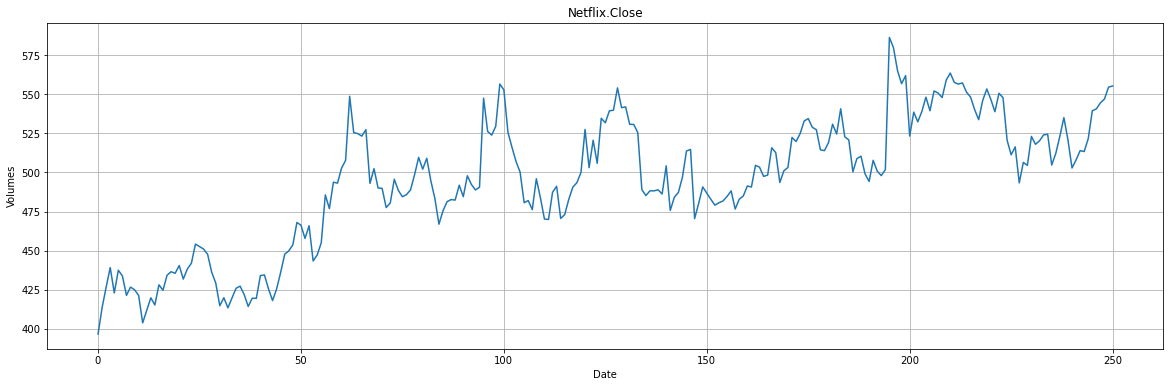

In [ ]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Volumes')
plt.plot(Netflix['Close'])
plt.title("Netflix.Close")
plt.show()

In [ ]:
Netflix

,Open,High,Low,Close,Adj Close,Volume
0,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
1,397.500000,417.820007,394.850006,413.549988,413.549988,11581000
2,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
3,437.000000,449.519989,431.609985,439.170013,439.170013,16128700
4,431.000000,432.000000,414.700012,422.959991,422.959991,12616300
...,...,...,...,...,...,...
246,540.010010,542.849976,529.229980,540.669983,540.669983,3355900
247,544.809998,554.169983,543.299988,544.530029,544.530029,3474200
248,543.500000,549.640015,541.450012,546.989990,546.989990,2151300
249,551.130005,556.900024,547.570007,554.580017,554.580017,4309800


# Checking Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
#Augmented Dickey -Fuller test # adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
result=seasonal_decompose(Netflix['Close'],model='multiplicative',freq=25)


<ipython-input-11-2a43d98e1f0a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result=seasonal_decompose(Netflix['Close'],model='multiplicative',freq=25)


<Figure size 432x288 with 0 Axes>

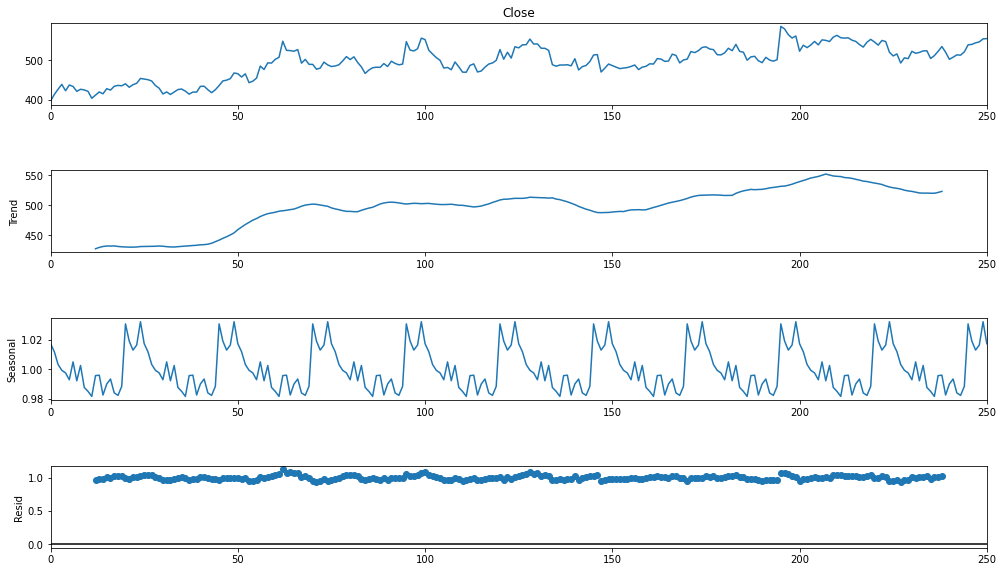

In [ ]:
fig=plt.figure()
fig=result.plot()
fig.set_size_inches(16,9)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
Netflixtest=adfuller(Netflix['Close'],autolag="AIC")

In [ ]:
print(Netflixtest)

(-2.095987413467284, 0.24613114094606375, 5, 245, {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}, 1867.87174810722)


In [ ]:
Nfout=pd.DataFrame(Netflixtest[0:4],index=['Test statistics','p-value','lag','Number of observation used'])

In [ ]:
Nfout

,0
Test statistics,-2.095987
p-value,0.246131
lag,5.000000
Number of observation used,245.000000


In [ ]:
Netflix['s1']=Netflix['Close']-Netflix['Close'].shift(1)#D=(shift)

In [ ]:
Netflix

,Open,High,Low,Close,Adj Close,Volume,s1
0,371.309998,400.510010,367.700012,396.720001,396.720001,11692900,NaN
1,397.500000,417.820007,394.850006,413.549988,413.549988,11581000,16.829987
2,413.000000,434.980011,412.250000,426.750000,426.750000,13561200,13.200012
3,437.000000,449.519989,431.609985,439.170013,439.170013,16128700,12.420013
4,431.000000,432.000000,414.700012,422.959991,422.959991,12616300,-16.210022
...,...,...,...,...,...,...,...
246,540.010010,542.849976,529.229980,540.669983,540.669983,3355900,1.250000
247,544.809998,554.169983,543.299988,544.530029,544.530029,3474200,3.860046
248,543.500000,549.640015,541.450012,546.989990,546.989990,2151300,2.459961
249,551.130005,556.900024,547.570007,554.580017,554.580017,4309800,7.590027


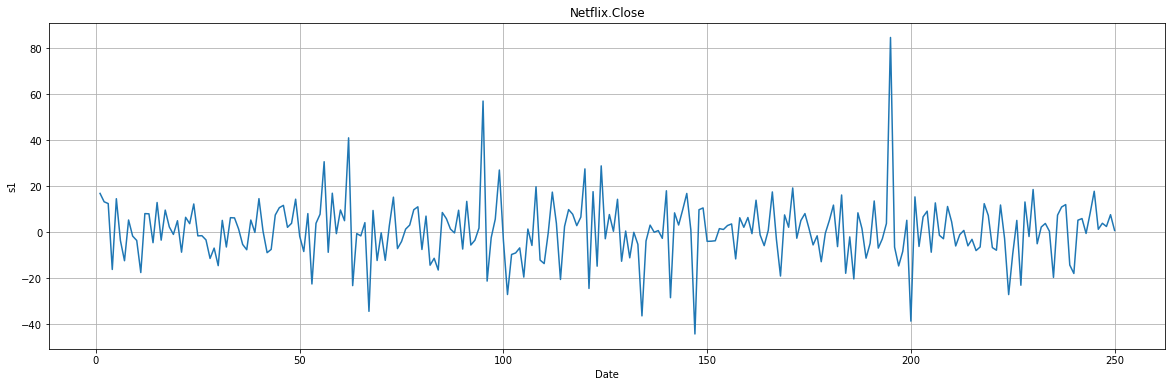

In [ ]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('s1')
plt.plot(Netflix['s1'])
plt.title("Netflix.Close")
plt.show()

In [ ]:
Netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
s1           1
dtype: int64

In [ ]:
Netflix=Netflix.dropna()

In [ ]:
Netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
s1           0
dtype: int64

In [ ]:
Netflixtest=adfuller(Netflix['s1'],autolag="AIC")
Netflixtest

(-7.760448994732131,
 9.485880510056984e-12,
 4,
 245,
 {'1%': -3.4573260719088132,
  '5%': -2.873410402808354,
  '10%': -2.573095980841316},
 1864.5694621969355)

In [ ]:
Nfout=pd.DataFrame(Netflixtest[0:4],index=['Test statistics','p-value','lag','Number of observation used'])

In [ ]:
Nfout

,0
Test statistics,-7.760449e+00
p-value,9.485881e-12
lag,4.000000e+00
Number of observation used,2.450000e+02


ACF=Auto corelation Factor

In [ ]:
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

ACF= in simple terms,it describes how well the present value of the series is related with its past values

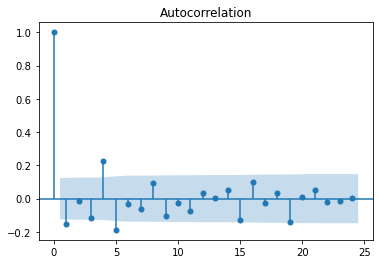

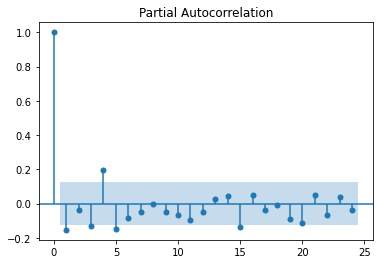

In [ ]:
plot_acf(Netflix['s1']);# q value
plot_pacf(Netflix['s1']);# P value

In [ ]:
model_arima=ARIMA(Netflix.Close,order=(0,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

C:\Users\splpt\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\splpt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

2003.8988330346715


In [ ]:
predictions=model_arima_fit.forecast(steps=25)[0]
predictions

array([555.87931531, 556.44863262, 557.01794993, 557.58726724,
       558.15658455, 558.72590186, 559.29521916, 559.86453647,
       560.43385378, 561.00317109, 561.5724884 , 562.14180571,
       562.71112302, 563.28044033, 563.84975764, 564.41907495,
       564.98839226, 565.55770957, 566.12702688, 566.69634418,
       567.26566149, 567.8349788 , 568.40429611, 568.97361342,
       569.54293073])